#Importando Libs

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns

In [ ]:
from scipy import special

In [ ]:
import itertools

In [ ]:
from datetime import timedelta
import random

In [ ]:
from IPython.display import display

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#sklearn para realizar as modelagens
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

#Lendo dados

In [ ]:
fraude_df = pd.read_csv('Fraud_Data.csv', header=0)

In [ ]:
ISP_df = pd.read_csv('IpAddress_to_Country.csv', header=0)

In [ ]:
fraude_df.dtypes

id                  int64
cadastro           object
compra             object
valor               int64
id_dispositivo     object
fonte              object
browser            object
genero             object
idade               int64
ip                float64
fraude              int64
dtype: object

In [ ]:
#Verificando valoers nulos no DF.
for col in fraude_df.columns:
    print("# de valores nulos em {}: {}".format(col, fraude_df[col].isnull().sum()))

# de valores nulos em id: 0
# de valores nulos em cadastro: 0
# de valores nulos em compra: 0
# de valores nulos em valor: 0
# de valores nulos em id_dispositivo: 0
# de valores nulos em fonte: 0
# de valores nulos em browser: 0
# de valores nulos em genero: 0
# de valores nulos em idade: 0
# de valores nulos em ip: 0
# de valores nulos em fraude: 0


#Analisando dados descritivos com método .describe()

In [ ]:
fraude_df.describe()

,id,valor,idade,ip,fraude
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [ ]:
#Vamos analisar as analises de IP

In [ ]:
for col in ISP_df.columns:
  print("{}: {}".format(col, ISP_df[col].dtype))

limite_inferior_ip: float64
limite_superior_ip: int64
pais: object


In [ ]:
#Com o lambda vamos verifica se os numeros de IP são int ou não

In [ ]:
ip_floats = ISP_df.limite_inferior_ip.apply(lambda x: not x.is_integer()).sum()
print(f"Numero de limites inferiores de endereço IP com decimal não-zero: {ip_floats}")

Numero de limites inferiores de endereço IP com decimal não-zero: 0


In [ ]:
#Chegamos a conclusão então que realmente os IPS estão certos, pois não foi detectado nenhum ip.
#Agora podemos transformar os IPS em inteiros.

In [ ]:
ISP_df.limite_inferior_ip = ISP_df.limite_inferior_ip.astype(int)

In [ ]:
#Vamos verificar os valoers nulos so para ter ctz.

In [ ]:
for col in ISP_df.columns:
  print(f"# de valores nulos em {col}: {ISP_df[col].isnull().sum()}")

# de valores nulos em limite_inferior_ip: 0
# de valores nulos em limite_superior_ip: 0
# de valores nulos em pais: 0


In [ ]:
#Ou seja não temos valores nulos
#Agora vamos verificar outliers

#Podemos observar que os valor min do limite inferior e do superior são diferentes, então temos valores separados por 25% o que faz sentido, porém se olharmos o valor máximo vemos que aparentemente eles são iguais e isso não faz muito sentido, deveriamos ter um limite inferior menor que o limite superior de Ips que nós temos. Então vamos chegar agora se realmente temos um outlier ou apenas um problema na apresentação da tabela.

In [ ]:
ISP_df.describe()

,limite_inferior_ip,limite_superior_ip
count,1.388460e+05,1.388460e+05
mean,2.724532e+09,2.724557e+09
std,8.975215e+08,8.974979e+08
min,1.677722e+07,1.677747e+07
25%,1.919930e+09,1.920008e+09
50%,3.230887e+09,3.230888e+09
75%,3.350465e+09,3.350466e+09
max,3.758096e+09,3.758096e+09


In [ ]:
display(ISP_df[ISP_df.limite_inferior_ip == ISP_df.limite_inferior_ip.max()])
display(ISP_df[ISP_df.limite_superior_ip == ISP_df.limite_superior_ip.max()])

,limite_inferior_ip,limite_superior_ip,pais
138845,3758096128,3758096383,Australia


,limite_inferior_ip,limite_superior_ip,pais
138845,3758096128,3758096383,Australia


In [ ]:
#Com a função MAX conseguimos ver os limites superiores e inferiores.
#Analisamos que não temos um outlier, pois eles são diferentes.
#Agora vamos verificar se temos informações faltando.

In [ ]:
ISP_df.describe()

,limite_inferior_ip,limite_superior_ip
count,1.388460e+05,1.388460e+05
mean,2.724532e+09,2.724557e+09
std,8.975215e+08,8.974979e+08
min,1.677722e+07,1.677747e+07
25%,1.919930e+09,1.920008e+09
50%,3.230887e+09,3.230888e+09
75%,3.350465e+09,3.350466e+09
max,3.758096e+09,3.758096e+09


In [ ]:
fraude_df.describe()

,id,valor,idade,ip,fraude
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [ ]:
#Comparando os valores minimos de IP dos dataframes vemos que os valores minimos dos IPS estão diferentes dos IPS do DF fraude_df
#Pode ser que há dados faltosos. Está diferença pode causar problemas quando for criar um mapa das frudes por exemplo

In [ ]:
#Função para comparar os parametros dos ips, para saber se eles estão dentro da contagem de ips do fraude_df:
def isp_counts(isp):
    pais = ISP_df[(ISP_df.limite_inferior_ip <= isp) & (ISP_df.limite_superior_ip >= isp)].pais
    if pais.shape[0] == 1:
        return print("Único")
    elif pais.shape[0] > 1:
        return print("Vários países")
    elif pais.shape[0] == 0:
        if isp > ISP_df.limite_superior_ip.max():
            return print("Muito grande")
        elif isp < ISP_df.limite_inferior_ip.min():
            return print("Muito pequeno")
        else:
            return print("Faltando")


ip_counts = fraude_df.ip.apply(isp_counts)
ip_counts.value_counts()

A saída de streaming foi truncada nas últimas 5000 linhas.
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Muito pequeno
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Ún

Series([], Name: ip, dtype: int64)

#Precisamos criar uma outra função para que possamos determinar qual seria o pais dos IPS ausentes. Embora seja psosive descartar apenas os paises de origem ausente, é possivel que esses endereços de ip correspondam a endereços falços criados para gerar uma fraude. Então neste caso esperamos que haja uma correlação entre estas informaçoes. Então vamos manter essas linhas e rotular o pais com origem faltando quando não tiver.

In [ ]:
#Nessa função vamos ler todos os endereços de IP.
#Se o edenreço de IP for => ao limite inferior e <= ao limite superior o que seria 1.
#Vamos escrever a informação obtente o nome do pais.
#Caso seja menor que 1 significa que não temos info, ou seja é pq esta faltando.
#Se caso for maior que  1 casos de muito grande e muito pequeno, simplemes escrevemos erro.
def ip_para_pais(ip):
    tmp = ISP_df[(ISP_df.limite_inferior_ip <= ip)
            & (ISP_df.limite_superior_ip >= ip)].pais
    if tmp.shape[0] == 1:
        return tmp.iloc[0]
    elif tmp.shape[0] < 1:
        return print("Faltando")
    elif tmp.shape[0] > 1:
        return print("Erro")

fraude_df["pais"] = fraude_df.ip.apply(ip_para_pais)

A saída de streaming foi truncada nas últimas 5000 linhas.
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Falta

In [ ]:
#Agora podemos ver o nome do pais em relação a faixa de IP que ele tinha
fraude_df.head()

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,fraude,pais
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,None
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


In [ ]:
#Vamos salvar esta versão completa para ficar mais facil de fazer a analise exploratoria dos dados.
fraude_df.to_csv("Dados_fraude_com_pais.csv", index=False)
fraude_df = pd.read_csv("Dados_fraude_com_pais.csv",  header=0)

#Analise de genero em relação a fraude

Text(0, 0.5, 'Casos')

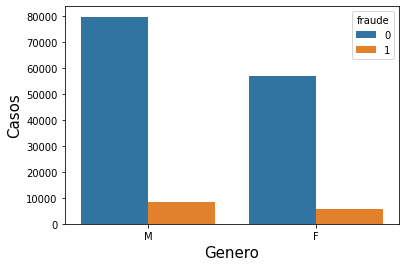

In [ ]:
sns.countplot(x='genero', hue='fraude', data=fraude_df)
plt.xlabel('Genero', fontsize=15)
plt.ylabel('Casos', fontsize=15)

In [ ]:
#De forma geral não da para afirmar que os homens são mais propensos a fraude
#Pq o numero de usuario homens é maior do que o de mulheres.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.42499999999999716, 0.5, 'Valor de compra')

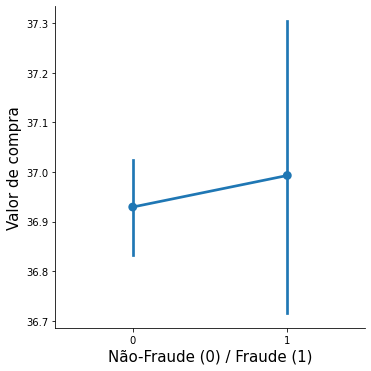

In [ ]:
#Vamos fazer uma analise estatistica em conjunto
sns.factorplot(x='fraude', y='valor', data=fraude_df)
plt.xlabel('Não-Fraude (0) / Fraude (1)',fontsize=15)
plt.ylabel('Valor de compra', fontsize=15)

In [ ]:
#Temos então a média de valor de comrpas para fraude e não fraude.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(-5.825000000000003, 0.5, 'Valor de compra')

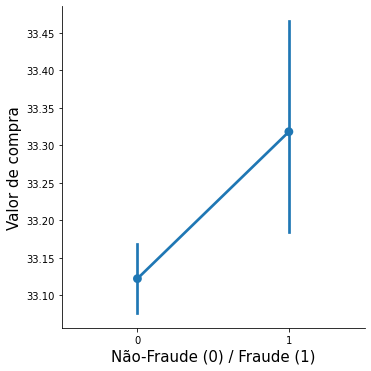

In [ ]:
#Vamos explorar agora a relação entre idade e fraude
sns.factorplot(x='fraude', y='idade', data=fraude_df)
plt.xlabel('Não-Fraude (0) / Fraude (1)',fontsize=15)
plt.ylabel('Valor de compra', fontsize=15)

In [ ]:
#POdemos ver que o aumento é muito sutil, questão de meses.
#Essa informação tbm não pode ser relacionada a conclusão.

Text(0, 0.5, 'Contagem')

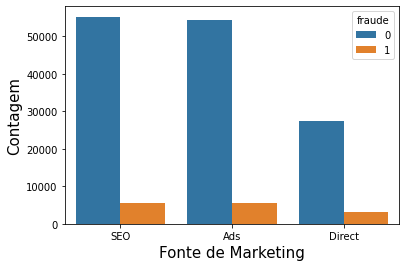

In [ ]:
#Agora vamos analisar o tipo de origem, fonte de marketing e fraude
sns.countplot(x='fonte', hue='fraude', data=fraude_df)
plt.xlabel('Fonte de Marketing',fontsize=15)
plt.ylabel('Contagem', fontsize=15)

In [ ]:
#As informações agora são mais interessantes, podemos ver que não parece, de forma geral, que exista uma fonte de Marketing mais associada as fraudes.
#Más existem menos fontes diretas associadas a fraude e a menos fontes diretas no geral.
#Portanto a diminuição tem o fator de não ser tão bem sucedidada quanto a optmização dos mecanismos de busca.
#Podemos ver que os clientes tendem a chegar a compania mais por conta dos algoratismos de pesquisa do que nos casos de anuncios.

#Agrupando dados
Apesar de a parte de análise exploratória parecer um pouco cansativa, é extremamente importante para nos ajudar nas etapas adiante.

Se já sabemos como cada uma das variáveis se relaciona, será muito mais fácil identificar quais são aquelas que entrarão em nosso modelo. Portanto, continuaremos a analisá-las visualmente.

Não observamos nenhuma relação em função do país de origem e a fraude. Porém, como temos muitos países para lidar, não há uma maneira visualmente muito agradável para analisarmos com clareza.

Como queremos analisar as fraudes, usaremos uma metodologia de agrupamento para unir parcelas de instâncias anormais pela qual cada localidade é responsável.

Para isso, criaremos dois novos dataframes em uma nova célula: um chamado sums_f sendo igual ao fraude_df[], o qual receberá fraude_df[] para puxar a variável "fraude" quando for igual a 1, ou seja, os casos de ["fraude"] com a função groupby() recebendo o agrupamento por pais e aplicação da soma com sum().

No outro dataframe, puxaremos os index que já temos com a função to_frame() seguido de reset_index() para que o sistema saiba as variáveis que trabalharemos.

Em seguida, faremos a mesma coisa para os casos de não fraude com sums_nf, que será igual a fraude_df[] recebendo esse mesmo banco como "fraude" quando for igual a 0, seguido do agrupamento por pais e soma da mesma forma. Por fim, faremos a mesma coisa para este caso no uso de to_frame(), e assim o sistema identificará as variáveis também.

In [ ]:
sums_f = fraude_df[fraude_df["fraude"] == 1]["fraude"].groupby(fraude_df.pais).sum()
sums_f = sums_f.to_frame().reset_index()

sums_nf = fraude_df[fraude_df["fraude"] == 0]["fraude"].groupby(fraude_df.pais).sum()
sums_nf = sums_nf.to_frame().reset_index()

Text(0, 0.5, 'Países')

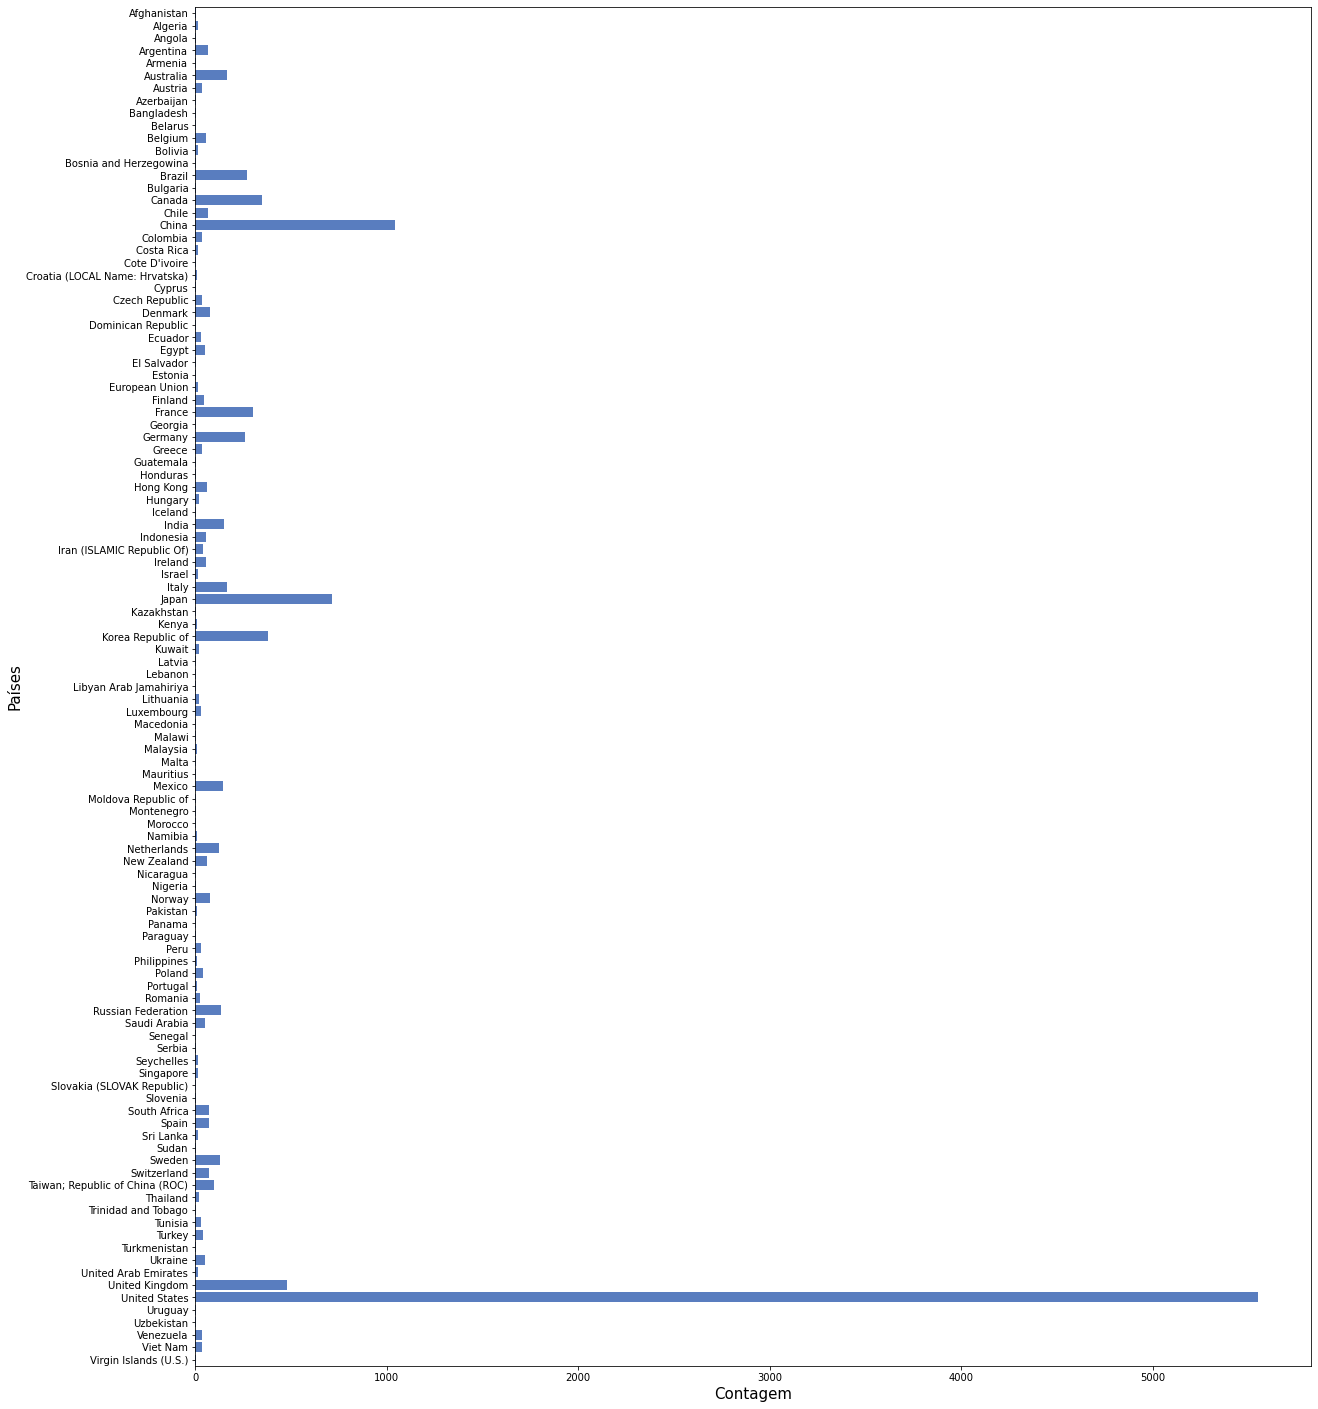

In [ ]:
#Vamos agora usar os novos DataFrames para criar os gráficos de barras.
f, ax = plt.subplots(figsize=(20,25))
sns.set_color_codes("muted")
sns.barplot(x="fraude", y="pais", data=sums_f,
            label="Total", color="b")
plt.xlabel("Contagem",fontsize=15)
plt.ylabel("Países",fontsize=15)

Como retorno, receberemos um grande gráfico organizado em ordem alfabética agrupado por países, e cada barra representa a soma das fraudes em cada um. Aparentemente, alguns lugares como Estados Unidos e Reino Unido possuem mais casos fraudulentos, mas não poderemos identificar esse fato como uma possível variável-foco, pois não sabemos efetivamente qual é o percentual de ocorrências.

Portanto, nossas próximas atividades serão as análises das variáveis com maior profundidade através do agrupamento de dados ou visualizações avançadas.

Agora que já analisamos todas as informações que podíamos sem manipulação de dados, começaremos a agrupar algumas delas.

Nesse momento, exploraremos a relação entre o número de IDs dos usuários exclusivos que estão associados a um único dispositivo ou único endereço de IP.

Para isso, usaremos a função groupby() novamente, mas sem aplicar a soma. Contaremos apenas o número de IDs por cliente para cada dispositivo e para cada IP.

Criaremos um novo dataframe chamado tmp_df para chamar DataFrame() de pd, o qual receberá a determinação das columns, sendo uma "fraude", outra "id_por_dispositivo" e a última "id_por_ip".

Na linha seguinte, escreveremos tmp_df[] recebendo a variável "fraude" que será exatamente igual ao banco fraude_df que já temos.

As próxima variável se chamará userid_count, onde pegaremos o banco de dados de fraude e agruparemos pela "id_dispositivo", contando quantos teremos com id.count().

Por fim, adicionaremos essa informação "id_por_dispositivo" em tmp_df[], sendo igual a fraud_df com id.dispositivo para lê-la no banco de dados. Aplicaremos novamente um lambda x, o qual será a função userid_count[] recém-criada.

Faremos exatamente a mesma coisa para a outra variável. A chamaremos de userid_count2 para diferenciá-la e agruparemos por "ip" seguido da contagem id.count().

Copiaremos o resultado de tmp_df[] em "id_por_ip" e utilizaremos apply() com a seleção da variável ip, recebendo lambda x para aplicar userid_count2 em x. Executaremos para detectar a presença de algum bug em nosso código.

In [ ]:
tmp_df = pd.DataFrame(columns=("fraude","id_por_dispositivo","id_por_ip"))
tmp_df["fraude"] = fraude_df["fraude"]

userid_count = fraude_df.groupby("id_dispositivo").id.count()
tmp_df["id_por_dispositivo"] = fraude_df.id_dispositivo.apply(lambda x: userid_count[x])

userid_count2 = fraude_df.groupby("ip").id.count()
tmp_df["id_por_ip"] = fraude_df.ip.apply(lambda x: userid_count2[x])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(16.299999999999997, 0.5, 'ID de usuário por endereço')

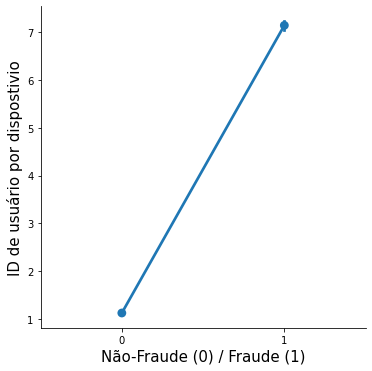

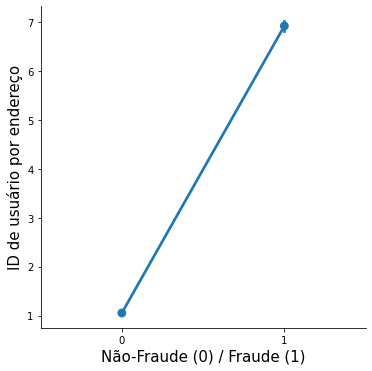

In [ ]:
sns.factorplot(x='fraude', y='id_por_dispositivo', data=tmp_df)
plt.xlabel('Não-Fraude (0) / Fraude (1)', fontsize=15)
plt.ylabel('ID de usuário por dispostivio', fontsize=15)

sns.factorplot(x='fraude', y='id_por_ip', data=tmp_df)
plt.xlabel('Não-Fraude (0) / Fraude (1)', fontsize=15)
plt.ylabel('ID de usuário por endereço', fontsize=15)

Como retorno da execução do código, receberemos dois gráficos e perceberemos correlações bastante claras e importantes entre ambos; vários IDs de usuários associados a um ID de dispositivo único ou a um endereço IP nos fornecem um grande indicador de comportamentos fraudulentos.

Essa observação faz sentido, pois se tivermos uma só pessoa realizando compras no E-commerce, teremos apenas um ID e um dispositivo, ou um ID e um endereço de IP, ou seja, caso haja um ID de usuário associado a vários dispositivos ou endereços de IP, é possível entender que há diversas pessoas ou robôs manipulando a conta.

Analisando os gráficos, veremos uma média de 7 IDs por dispositivo ou endereço de IP. Pode ser que haja um mesmo computador com um IP próprio conectado em uma mesma rede que está utilizando várias contas, o que indica fraudes também.

A seguir, analisaremos a relação entre o tempo da inscrição de compra e a fraude.

#tempo da inscrição de compra e a fraude.

In [ ]:
tmp_df["cadastro"] = fraude_df.cadastro.apply(pd.to_datetime)
tmp_df["compra"] = fraude_df.compra.apply(pd.to_datetime)

tmp_df["tempo"] = (tmp_df.compra - tmp_df.cadastro).apply(lambda x: x.seconds)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(-8.825000000000003, 0.5, 'Tempo entre início e compra (segundos)')

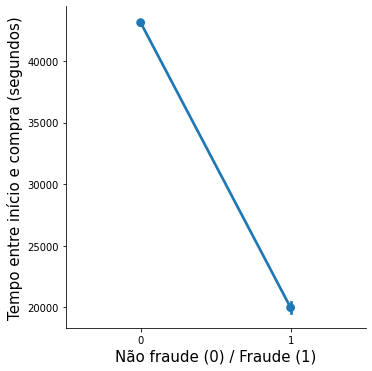

In [ ]:
sns.factorplot(x="fraude", y="tempo", data=tmp_df)
plt.xlabel("Não fraude (0) / Fraude (1)", fontsize=15)
plt.ylabel("Tempo entre início e compra (segundos)", fontsize=15)

Executaremos esta célula e obteremos o gráfico. Perceberemos que, quando se trata de uma não fraude, o tempo entre o cadastro e a compra é maior, pois é necessário entrar em um website e preencher com os dados pessoais e de pagamento na página, o que acarreta certa demora.

Nos casos de fraude, o tempo corresponde a menos da metade do tempo necessário para as situações regulares. Então, também são correlações claramente importantes, pois prova que essa diferença está fortemente relacionada com atividades fraudulentas também.

Portanto, teremos muitas informações para fazermos outras análises que abarcam o dia da semana, hora do dia, semana do ano e etc.

In [ ]:
tmp_df.head()

,fraude,id_por_dispositivo,id_por_ip,cadastro,compra,tempo
0,0,1,1,2015-02-24 22:55:49,2015-04-18 02:47:11,13882
1,0,1,1,2015-06-07 20:39:50,2015-06-08 01:38:54,17944
2,1,12,12,2015-01-01 18:52:44,2015-01-01 18:52:45,1
3,0,1,1,2015-04-28 21:13:25,2015-05-04 13:54:50,60085
4,0,1,1,2015-07-21 07:09:52,2015-09-09 18:40:53,41461


Text(0, 0.5, 'Contagem')

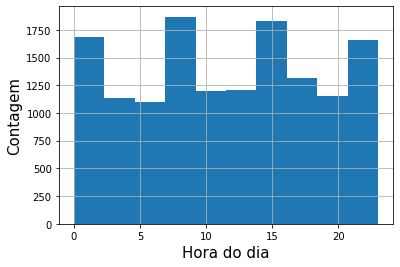

In [ ]:
tmp_df[tmp_df["fraude"] == 1].cadastro.apply(lambda x: x.hour).hist()
plt.xlabel("Hora do dia", fontsize=15)
plt.ylabel("Contagem", fontsize=15)

Como retorno, receberemos a informação das horas do dia em que as situações de fraude mais significativas começam a acontecer. Aparentemente, há uma correlação que não faz muito sentido em relação aos momentos do dia.

Faremos uma análise em relação aos dias da semana também. Aplicaremos a mesma metodologia anterior, alterando x.hour por x.dayofweek e colocando "Dia da semana" na nomenclatura do eixo x.

Text(0, 0.5, 'Contagem')

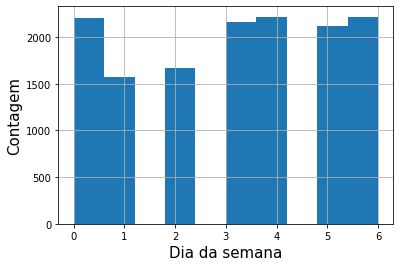

In [ ]:
tmp_df[tmp_df["fraude"] == 1].cadastro.apply(lambda x: x.dayofweek).hist()
plt.xlabel("Dia da semana", fontsize=15)
plt.ylabel("Contagem", fontsize=15)

Desta forma, teremos mais informações, e parece que a fraude acontece com bastante regularidade tanto ao longo das horas do dia quanto dos dias da semana.

Agora, analisaremos a quantidade de fraudes por semanas do ano para avaliar se algum período festivo possui maior ocorrência, por exemplo.

Faremos a mesma coisa, escrevendo x.week no lugar de x.dayofweek e "Semana do ano" em xlabel().

Text(0, 0.5, 'Contagem')

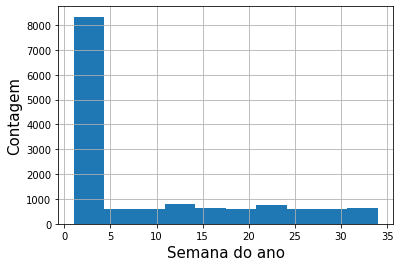

In [ ]:
tmp_df[tmp_df["fraude"] == 1].cadastro.apply(lambda x: x.week).hist()
plt.xlabel("Semana do ano", fontsize=15)
plt.ylabel("Contagem", fontsize=15)

Como resultado, veremos que há um enorme número de ocorrências de fraude nas primeiras semanas do ano que correspondem aos períodos de Natal e Ano Novo. Porém, não teremos certeza de que isso será um recurso útil em nosso conjunto de dados, afinal é uma época quando muitos clientes regulares costumam fazer compras no E-commerce.

Portanto, é mais apropriado simplesmente recomendar que a equipe de segurança da empresa esteja sempre em alerta máximo durante as primeiras três semanas do ano.

A partir dessa aula, já pudemos analisar quais são as variáveis importantes ou não, além de fazermos algumas recomendações. Ainda produziremos um modelo nas próximas aulas com outras indicações extras para aprimorar a segurança do site.

A seguir, construiremos os recursos com base no país de origem, número de IDs de usuários associados aos IDs de dispositivos e endereços de IP exclusivos, bem como os períodos de tempo entre a inscrição e a compra.


# Engenharia de Recursos

Para evitar qualquer multicolinearidade, geraremos apenas um recurso que será a média do número de IDs de usuários associados ao ID do dispositivo ou ao endereço de IP.

In [ ]:
userid_count3 = fraude_df.groupby("id_dispositivo").id.count()
fraude_df["id_por_dispositivo"] = fraude_df.id_dispositivo.apply(lambda x: userid_count3[x])

fraude_df.head()

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,fraude,pais,id_por_dispositivo
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,12
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,1


In [ ]:
userid_count4 = fraude_df.groupby("ip").id.count()
fraude_df["id_por_ip"] = fraude_df.ip.apply(lambda x: userid_count4[x])

fraude_df.head()

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,fraude,pais,id_por_dispositivo,id_por_ip
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,1,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,12,12
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN,1,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,1,1


In [ ]:
fraude_df["media_id"] = (fraude_df.id_por_dispositivo + fraude_df.id_por_ip) * 0.5

fraude_df.head()

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,fraude,pais,id_por_dispositivo,id_por_ip,media_id
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,1,1,1.0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1,1,1.0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,12,12,12.0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN,1,1,1.0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,1,1,1.0


Feito isso, teremos mais uma coluna, a qual será a única com mais relevância para não precisarmos ficar adicionando variáveis desnecessariamente.

Em seguida, converteremos o tempo de inscrição e compra em objetos de data e hora com to_datetime, da mesma forma como fizemos no banco de dados temporário, mas dessa vez usaremos o total.

In [ ]:
fraude_df.cadastro = fraude_df.cadastro.apply(pd.to_datetime)
fraude_df.compra = fraude_df.compra.apply(pd.to_datetime)
fraude_df["tempo"] = (fraude_df.compra - fraude_df.cadastro).apply(lambda x: x.seconds)

fraude_df.head()

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,fraude,pais,id_por_dispositivo,id_por_ip,media_id,tempo
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,1,1,1.0,13882
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1,1,1.0,17944
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,12,12,12.0,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN,1,1,1.0,60085
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,1,1,1.0,41461


Agora, separaremos a coluna pais em diversas outras chamadas dummies, lembrando que a variável dummie é categória que será transformada em numérica. Ou seja, a variável pais é categórica, pois temos várias categorias que representam cada localidade. A questão é que iremos transformá-las em colunas numéricas, então criaremos a quantidade de colunas correspondentes ao número de países existentes. Quando um país for especificado, terá valor 1, e os demais terão 0.

A ideia é que possamos adicionar uma variável categórica nos modelos numéricos, caso necessário.

Em uma nova célula, criaremos pais.dummies. A biblioteca Pandas possui a função get_dummies() que receberá as variáveis pais e o prefix igual a 'pais', para que as novas colunas sejam criadas com este prefixo.

Em seguida, concatenaremos o banco de dados original e o novo pais_dummies com concat() para que fiquem juntos. Nessa mesma linha, o axis será igual a 1.

Com head() veremos o resultado na execução.

In [ ]:
pais_dummies = pd.get_dummies(fraude_df.pais, prefix='pais')
fraude_df = pd.concat([fraude_df, pais_dummies], axis=1)

fraude_df.head()

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,fraude,pais,id_por_dispositivo,id_por_ip,media_id,tempo,pais_Afghanistan,pais_Albania,pais_Algeria,pais_Angola,pais_Antigua and Barbuda,pais_Argentina,pais_Armenia,pais_Australia,pais_Austria,pais_Azerbaijan,pais_Bahamas,pais_Bahrain,pais_Bangladesh,pais_Barbados,pais_Belarus,pais_Belgium,pais_Belize,pais_Benin,pais_Bermuda,pais_Bhutan,pais_Bolivia,pais_Bonaire; Sint Eustatius; Saba,pais_Bosnia and Herzegowina,pais_Botswana,...,pais_Saint Kitts and Nevis,pais_Saint Martin,pais_San Marino,pais_Saudi Arabia,pais_Senegal,pais_Serbia,pais_Seychelles,pais_Singapore,pais_Slovakia (SLOVAK Republic),pais_Slovenia,pais_South Africa,pais_South Sudan,pais_Spain,pais_Sri Lanka,pais_Sudan,pais_Sweden,pais_Switzerland,pais_Syrian Arab Republic,pais_Taiwan; Republic of China (ROC),pais_Tajikistan,pais_Tanzania United Republic of,pais_Thailand,pais_Trinidad and Tobago,pais_Tunisia,pais_Turkey,pais_Turkmenistan,pais_Uganda,pais_Ukraine,pais_United Arab Emirates,pais_United Kingdom,pais_United States,pais_Uruguay,pais_Uzbekistan,pais_Vanuatu,pais_Venezuela,pais_Viet Nam,pais_Virgin Islands (U.S.),pais_Yemen,pais_Zambia,pais_Zimbabwe
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,1,1,1.0,13882,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1,1,1.0,17944,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,12,12,12.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN,1,1,1.0,60085,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,1,1,1.0,41461,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


O problema agora é que teremos muitas colunas para trabalhar, e precisaremos remover aquelas que não nos fornecem informações relevantes.

Nesta aula, veremos matematicamente quais serão as variáveis que realmente importam. Porém, já poderemos fazer uma análise baseada no que vimos anteriormente, como gênero, valor da compra, fonte, browser e idade que não são dados interessantes o suficiente. Além disso, vimos que o número de ID, ID do dispositivo, hora de cadastro e compra podem parecer importantes ou não, dependendo do tipo de análise que estamos fazendo.

Então, o primeiro passo é remover as informações que acreditamos não ser relevantes. Para isso, usaremos a função drop() no banco de dados, e basta escrevermos o nome das variáveis que queremos eliminar, desta forma:

In [ ]:
fraude_df.columns

Index(['id', 'cadastro', 'compra', 'valor', 'id_dispositivo', 'fonte',
       'browser', 'genero', 'idade', 'ip',
       ...
       'pais_United States', 'pais_Uruguay', 'pais_Uzbekistan', 'pais_Vanuatu',
       'pais_Venezuela', 'pais_Viet Nam', 'pais_Virgin Islands (U.S.)',
       'pais_Yemen', 'pais_Zambia', 'pais_Zimbabwe'],
      dtype='object', length=197)

In [ ]:
fraude_df.drop([
            'id', 
            'cadastro', 
            'compra', 
            'valor', 
            'id_dispositivo',
            'ip', 
            'id_por_dispositivo',
            'id_por_ip',
            'pais',
            'fonte',
            'browser', 
            'genero', 
            'idade'], axis=1, inplace = True)

Essas são exatamente as variáveis que trabalhamos na análise exploratória, as quais não possuem relevância em nosso objetivo. Executando esta célula, teremos excluído as colunas indesejadas.

Porém, continuamos com mais de 150 colunas. Para reduzir essa quantidade, aplicaremos a Seleção de Recursos, mas é importante fazê-la sobre os recursos reais que iremos usar.

A seguir, como os algoritmos de detecção de anomalias que iremos usar se beneficiam de recursos mais gaussianos do que não gaussianos, começaremos transformando os não categóricos primeiro.

#Transformando recursos em Gaussianos

Como fizemos no passo anterior, os algoritmos de detecção de anomalias que usaremos se beneficiarão de recursos mais gaussianos.

O primeiro é o número médio de IDs de usuário, o qual será bimodal conforme veremos. Uma representação desse tipo possui dois picos na curva do gráfico, ou seja, há dois modos como se houvesse dois máximos e não apenas um.

Quando a flag de fraudes for igual a 1 em nosso banco fraude_df, veremos como o histograma se distribui com a media_id. O normed será True e ajustaremos o tamanho em bins para 25.

Em seguida, nomearemos o eixo x com o "Número médio de IDs" com fontsize sendo 15 e o ylabel() será a "Contagem normalizada" com o mesmo tamanho de fonte.

Text(0, 0.5, 'Contagem normalizada')

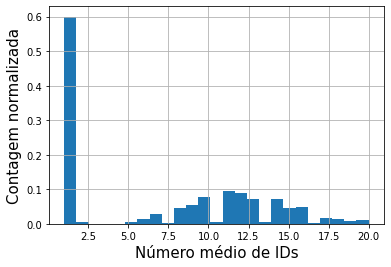

In [ ]:
fraude_df[fraude_df['fraude'] == 1].media_id.hist(density=True, bins=25)
plt.xlabel('Número médio de IDs', fontsize=15)
plt.ylabel('Contagem normalizada', fontsize=15)

Como retorno, veremos que o que temos é razoavelmente parecido; há um grande pico entre 1.0 e 1.5, e em seguida teremos uma distribuição gaussiana, ou seja, uma distribuição normal centrada por volta de 12 com o desvio padrão de aproximadamente 3.

Devido à natureza bimodal, não há muito o que fazer para tornar o gráfico mais gaussiano ou normal, pois temos um pico inicial. Portanto, é como se tivéssemos uma curva com dois modos, mas um deles é bastante concentrada enquanto o outro é bem mais espalhado.

Também precisaremos observar a distribuição do recurso de tempo. Faremos a mesma coisa para o intervalo entre o cadastro e a compra em segundos, nomeando o eixo x como "Tempo de compra e inscrição (segundos)" e o y da mesma forma que o código anterior.

Text(0, 0.5, 'Contagem normalizada')

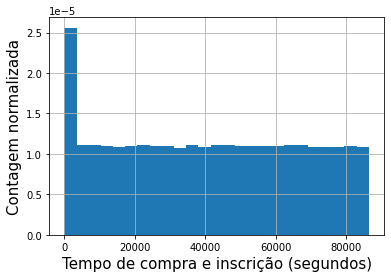

In [ ]:
fraude_df.tempo.hist(density=True, bins=25)
plt.xlabel("Tempo de compra e inscrição (segundos)", fontsize=15)
plt.ylabel("Contagem normalizada", fontsize=15)

No retorno, teremos números distribuídos uniformemente, tirando o início que provavelmente está relacionado aos casos de fraude em que o tempo é de apenas 1 segundo. Mas queremos transformá-los em valores com distribuição gaussiana ou seja, de forma normal.

Para fazer isso, usaremos a seguinte transformação que pode ser encontrada em artigos científicos que explicam melhor seu funcionamento, como Remarks on a Multivariate Transformation de Murray Rosenblatt e Transformation of arbitrary distributions to the normal distribution with application to EEG test–retest reliability escrito por S.J. van Albada.

https://caelum-online-public.s3.amazonaws.com/1368-modelos-preditivos-deteccao-fraude/Transcri%C3%A7%C3%A3o/Imagens/3_3_4_fonte.png

Basicamente, o phi será uma variável aleatória uniformemente distribuída como vemos no gráfico, quase como uma linha reta. Já o X será dessa mesma forma conforme queremos obter, enquanto o erf elevado a -1 será o inverso da função-erro.

Antes que essa transformação possa ser feita, precisaremos primeiro normalizar o recurso para que fique entre zero e um a fim de facilitar as análises estatísticas. Há diversas formas possíveis, então esta em especial não é obrigatória.

Esse tipo de conversão mais voltada à análise estatística é usada para simplificar a construção do modelo e diminuir falhas. Portanto, existem diversas transformações possíveis se há qualquer dificuldade nessa questão, apesar desta apresentada ser um bom exemplo em situações com esse mesmo tipo de padrão, mas não é a única.

Tentaremos reescalar estes valores. Em uma nova célula, não utilizaremos nenhuma das funções prontas da Pandas, apesar desta já possuir funções de escalonamento. Porém, aqui construiremos uma nova justamente para entendermos melhor nosso cenário.

Definiremos uma função chamada rescale_series() cujo argumento será ser. Em seguida, definiremos o valor mínimo em ser_min, sendo igual a ser.min() menos 1e-5 para termos uma margem de erro como uma questão puramente numérica, o que não é obrigatório.

Na sequência, escreveremos ser_max para definir o máximo com a operação de soma com ser.max(). Depois, a nova série new_ser será o valor ser que temos, menos o valor mínimo dividido pelo máximo subtraindo o mínimo.

Por fim, aplicaremos lambda x com a equação np.sqrt(2)*special.erfinv(2*x - 1) para o retorno ser new_ser.

In [ ]:
def rescale_series(ser):
    ser_min = ser.min() - 1e-5
    ser_max = ser.max() + 1e-5
    new_ser = (ser - ser_min) / (ser_max - ser_min)
    new_ser = new_ser.apply(lambda x: np.sqrt(2)*special.erfinv(2*x - 1))
    return new_ser

Text(0, 0.5, 'Contagem normalizada')

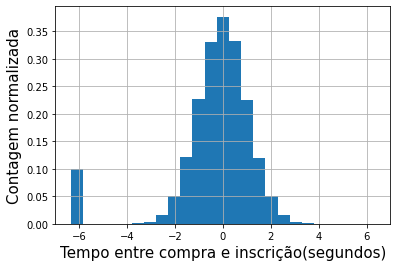

In [ ]:
fraude_df["tempo"] = rescale_series(fraude_df.tempo)
fraude_df.tempo.hist(density=True, bins=25)
plt.xlabel("Tempo entre compra e inscrição(segundos)", fontsize=15)
plt.ylabel("Contagem normalizada", fontsize=15)

O gráfico resultante se transformou em uma distribuição normal que facilitará nosso trabalho, mas continuaremos a ter aquele valor inicial que indica as fraudes.

Para reiterar, seria possível usarmos outras funções prontas de escalonamento de dados como a MinMaxScaler(). Mas ao usá-la, os valores acima de padronização constam como infinitos quando fazemos a transformação citada.

Então, quando fazemos a conversão diretamente, os valores permanecem floats, o que simplifica a identificação do que realmente é um outlier e o que não é.

Do contrário, precisaríamos limpar o dataset novamente para remover esses infs, o que seria já uma outra análise para entender o que significam. Portanto, enquanto permanecem numéricos, poderemos simplesmente deixar-los para vermos o resultado sem manipular demais.

#escalonamento em nosso banco de dados de forma geral.

Neste passo, aplicaremos o escalonamento em nosso banco de dados de forma geral.

Na célula seguinte, definiremos basicamente a mesma função rescale_serie(ser) mas sem a segunda parte da transformação com a equação vista anteriormente, pois somente transformaremos os valores para que fiquem entre zero e um.

Em seguida, obteremos todos os nomes de colunas que não são codificados, ou seja, todas menos a dos países que gerou os dummies.

Chamaremos de onehotencoded, pois é a nomenclatura comum dada para as colunas. Será igual a feature, que é composto basicamente pelas variáveis em fraude_df.columns, no caso de "pais" não estar em feature e esta for diferente da flag "fraude".

Redimensionaremos todas as colunas não codificadas, afinal as que são codificadas como pais e fraude já são binárias, e não faria sentido recodificá-las.

Para col em onhotencoded, a fraude_df[col] lerá todas as colunas. Usaremos o rescale_series() com a mesma variável.

Também criaremos dois bancos de dados: X e Y. O primeiro será composto pelas colunas que temos no caso de col ser diferente de "fraude", e o segundo será o target e o conjunto de treinamentos ou inputs dos modelos.

In [ ]:
def rescale_series(ser):
    ser_min = ser.min()
    ser_max = ser.max()
    new_ser = (ser - ser_min) / (ser_max - ser_min)
    return new_ser

onehotencoded = [feature for feature in fraude_df.columns if 'pais' not in feature and feature !='fraude']

for col in onehotencoded:
    fraude_df[col] = rescale_series(fraude_df[col])

    X = fraude_df[ [col for col in fraude_df.columns if col != "fraude"]]
    Y = fraude_df["fraude"]

Salvaremos os bancos de dados X e Y para usarmos no futuro quando fizermos a análise da importância dos países no modelo, observando se realmente é importante termos todas as variáveis extras.

Em uma nova célula, usaremos a função to_csv() para ambos com a variável que queremos guardar e o nome que daremos, sendo os index iguais a False.

In [ ]:
X.to_csv('X.csv',index=False)
Y.to_csv('Y.csv',index=False)

O problema é que temos mais de duzentos recursos até o momento. Portanto, utilizaremos a Seleção de Recursos com Classificador de Árvores Extras para reduzir este número.

O primeiro passo é importar somente o modelo ExtraTreesClassifier de sklearn.ensemble, para então criar uma instância do classificador que chamaremos de csf com o uso da função ExtraTreesClassifier(). Nesta, usaremos fit() com os dois bancos X e Y para determinar quais são as colunas mais importantes.

Então, criaremos um banco de dados para mapear os recursos e suas relevâncias. Chamaremos como features e geraremos o dataframe pd.DataFrame(), nomeando a variável como 'feature' que será igual às columns de X. A outra se chamará 'importância' e será o resultado do Classificador de Árvores Extras clf com feature_importances_ para já calcularmos a importância das variáveis automaticamente.

Por fim, imprimiremos os recursos mais relevantes quando features.importancia for maior do que a média np.mean() da importância, e os organizaremos de forma descendente por "importancia" com sort_values().

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier()
_ = clf.fit(X,Y)

features = pd.DataFrame()
features['feature'] = X.columns
features['importancia'] = clf.feature_importances_

features [features.importancia > np.mean(features.importancia)].sort_values(by="importancia", ascending=False)

,feature,importancia
1,tempo,0.673810
0,media_id,0.320604


Teremos duas respostas como resultado, e parece que realmente o tempo e a media_id são as variáveis mais significativas. Também constataremos que o país de origem não é relevante no final das contas.

Portanto, aprendemos que tanto a análise exploratória visual quanto a parte numérica são extremamente importantes e devem ser complementadas.

A seguir, analisaremos os casos de fraude somente com essas duas variáveis.

#Métricas de Performance

Neste passo, finalmente começaremos a parte de modelagem.

Há duas maneiras básicas de abordar a detecção de anomalias: a partir de uma perspectiva supervisionada e uma não-supervisionada.

Começando pela primeira, usaremos um algoritmo de Floresta de Isolamento, o qual isolará as observações selecionando aleatoriamente uma variável. Em seguida, selecionará outras variáveis de forma recursiva para tentar separar nossa amostra. Essa divisão pode ser representada como uma estrutura de árvore, na qual o número de separações será equivalente ao comprimento do caminho da raiz até o topo da árvore. A partir disso, quanto menor for essa medida, mais fácil será isolar a amostra e maior será a probabilidade de representar uma anomalia, pois teremos menos trabalho para separá-la.

Portanto, realizaremos uma validação cruzada cinco vezes para não rodar apenas uma vez, pois queremos saber sobre a performance com mais de uma execução. Usaremos a métrica F1 Score que será aprofundada mais adiante.

Antes, importaremos as bibliotecas do Scikit Learn que iremos usar. Como não a utilizaremos inteira, apenas faremos o import de RobustScaler da sub-biblioteca preprocessing, a qual removerá a mediana e dimensionará os dados de acordo com as faixas dos quartis, como uma forma de normalização.

Em seguida, importaremos train_test_split a partir de model_selection, que servirá para separar os dados de treinamento e de validação.

Depois será a vez de IsolationForest de ensemble e GridSearchCV a partir de model_selection, sendo este último responsável pela metodologia que usaremos para rodar várias vezes e encontrar os melhores recursos.

Também importaremos o classification_report, roc_auc_score do tamanho da área debaixo da curva ROC que veremos adiante, e o próprio roc_curve vindos da metrics. Desta mesma sub-biblioteca, importaremos a importante f1_score.

In [ ]:
X_dev, X_eval, Y_dev, Y_eval = train_test_split(X, Y, train_size = 0.75, random_state = 23)
Y_dev = Y_dev.apply(lambda x: 1 if x == 0 else -1)
Y_eval = Y_eval.apply(lambda x: 1 if x == 0 else -1)

In [ ]:
IF = IsolationForest(max_samples='auto', contamination=0.095, random_state=1)
param_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500]}

clf = GridSearchCV(IF,
                   param_grid,
                   cv=5,
                   n_jobs=10,
                   scoring='f1',
                   verbose=10)

_= clf.fit(X_dev, Y_dev)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 tasks      | elapsed:  1.5min
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:  7.2min
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed: 15.6min
[Parallel(n_jobs=10)]: Done  31 out of  45 | elapsed: 26.7min remaining: 12.1min
[Parallel(n_jobs=10)]: Done  36 out of  45 | elapsed: 36.0min remaining:  9.0min
[Parallel(n_jobs=10)]: Done  41 out of  45 | elapsed: 38.4min remaining:  3.7min
[Parallel(n_jobs=10)]: Done  45 out of  45 | elapsed: 39.1min finished


Após o término da execução do código anterior, veremos os resultados obtidos.

Escreveremos IF_best que será composto pelos melhores parâmetros que conseguimos no IsolationForest, ou seja, clf.best_estimator_.

Em seguida, criaremos a variável Y_predicted que preverá o comportamento usando esses valores dos melhores com o IF_best.predict() recebendo X_eval.

Também definiremos a curva roc_auc com roc_auc_score() que será em função do target de teste Y_eval, o qual será testado com o melhor modelo Y_predicted.

Depois imprimiremos a função classification_report que dará as informações dos resultados e métricas. Será novamente em função do Y_eval e Y_predicted. Para nomear, digitaremos target_names como sendo "anômalo" e "normal".

Adicionaremos mais um print() com "Área sob a curva ROC: {}" com o formato :0, 3f entre as chaves e o format() com a variável roc_auc.

Por fim, computaremos a curva e a área sob esta em IF_probs sendo o IF_best.decision_function() com X_eval. Em seguida, definiremos os falsos positivos fpr, os verdadeiros positivos tpr, e o threshold do limite sendo iguais a roc_curve() recebendo Y_eval e IF_probs.

Feito isso, poderemos plotar com plt.plot() os falsos e os verdadeiros positivos, bem como lw sendo 1 para a largura da linha.

Em seguida, plotaremos uma linha resultante no caso de termos ido "na sorte", ou seja, se tivermos escolhido o que é fraude e o que não é aleatoriamente, afinal nosso modelo deverá apresentar resultados melhores.

Com outro plt.plot(), pegaremos a curva parametrizada ou diagonal, o tipo de linha como tracejado, as cores com valores 0.6, 0.6, 0.6 de RGB que queremos e o label escrito "sorte".

Ajustaremos os limites de x e y para -0.05, 1.05 com xlim() e ylim() para que não fiquem muito grandes.

Agora, escreveremos os nomes das legendas de nossos eixos com xlabel() sendo "Taxa de falsos positivos" com fontsize de 15 e ylabel() como "Taxa de verdadeiros positivos" com mesmo tamanho de fonte.

Finalmente, apenas adicionaremos um título "Curva ROC" com fontsize igual a 12 e mostraremos tudo junto com show().

              precision    recall  f1-score   support

     anomalo       0.47      0.48      0.48      3546
      normal       0.95      0.95      0.95     34232

    accuracy                           0.90     37778
   macro avg       0.71      0.71      0.71     37778
weighted avg       0.90      0.90      0.90     37778

Area sob a curva ROC: {:0, 3f} 0.7108712561128623


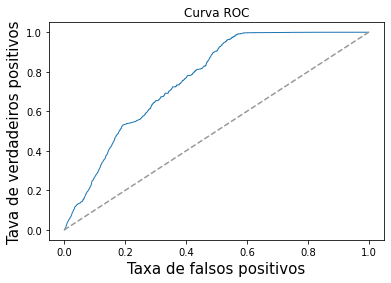

In [ ]:
IF_best = clf.best_estimator_
Y_predicted = IF_best.predict(X_eval)
roc_auc = roc_auc_score(Y_eval, Y_predicted)

print (classification_report(Y_eval,
                Y_predicted,
                target_names=["anomalo","normal"]))
print("Area sob a curva ROC: {:0, 3f}", format(roc_auc))

IF_probs = IF_best.decision_function(X_eval)
fpr, tpr, threshold = roc_curve(Y_eval, IF_probs)

plt.plot(fpr, tpr, lw=1)

plt.plot([0,1],[0,1], '--', color=(0.6,0.6,0.6), label="sorte")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel("Taxa de falsos positivos", fontsize=15)
plt.ylabel("Tava de verdadeiros positivos", fontsize=15)
plt.title("Curva ROC", fontsize=12)

plt.show()

O primeiro elemento a rodar é o classification_report(), e já poderemos ver a Precisão, o recall, o f1_score e o suporte que nos dá as informações de contagem. Na sequência, teremos a curva e a Área Sob a Curva ROC.

A Precisão apresentou resultados muito semelhantes aos outros dois valores, o que é uma indicação ruim. A segunda métrica de Revocação é a frequência com a qual o nosso classificador encontrará os exemplo de uma classe, ou seja, responde a seguinte pergunta:

"Quando realmente faz parte da classe X e o quão frequentemente classificamos como tal?"

Pode ser que muitas vezes a precision piore ao melhorarmos a recall por exemplo, o que é natural; quanto maior o rigor para acertar ou melhorar a precisão, menos disposição teremos de errar ou aumentar a revocação também. Portanto, precisaremos tem um bom equilíbrio entre ambos com um valor intermediário que nos dê uma informação intermediária.

Também teremos os dados de micro avg e macro avg. Este primeiro também funciona como uma Acurácia do modelo.

A Área Sob a Curva não possui o melhor valor que poderíamos obter, pois é a capacidade discriminativa de um teste, ou seja, como classifica corretamente os anômalos e não anômalos, e quanto mais perto de 1, melhor.

Seu valor está entre 0.7 e 0.8, o que é regular; o ideal seria aumentá-lo. Portanto, quanto mais rápido nossa curva subir e quanto maior for a Área Sob a Curva, mais verdadeiros positivos e menos falsos positivos teremos, além de melhorarmos nosso modelo.

Poderemos ver que este modelo em específico funciona melhor do que no caso da "sorte", mas o importante é sabermos quais são os casos fraudulentos não identificados, pois é o que gerará prejuízos à empresa.

Muitas vezes não sabemos qual métrica utilizar, e realmente o tipo dependerá do problema; em nosso caso, temos uma curva ROC de aproximadamente 7.3 e talvez não seja ruim, basta analisarmos nossa Matriz de Confusão para ver se estamos identificando as fraudes corretamente.

Pode ser que percamos alguns clientes que não cometeram fraudes, mas o maior prejuízo para a empresa é realmente os casos fraudulentos não identificados.

Para checarmos a Matriz de Confusão, importaremos confusion_matrix de sklearn.metrics. Em seguida, chamaremos de cnf_matrix_IF para usarmos a função. Como parâmetro, passaremos o Y_eval de teste e o Y_predicted do melhor modelo. Por fim, imprimiremos o cnf_matrix_IF para podermos rodar o código.

In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix_IF = confusion_matrix(Y_eval, Y_predicted)
print(cnf_matrix_IF)

[[ 1689  1857]
 [ 1868 32364]]


Após a execução, teremos quatro números. Essa matriz possui a primeira linha com a informação de valores previstos e a segunda com a informação verdadeira. Cada posição na matriz corresponde aos falsos positivos e negativos, bem como aos verdadeiros positivos e negativos, conforme o exemplo anterior com a simulação de detecção de um gato nas imagens.

Em nosso caso, nossa preocupação é com o valor que contém o erro tipo 2 ou falsos negativos, onde o modelo prevê uma classe negativa quando é positiva na realidade.

A grande questão é sobre termos um resultado melhor no caso de usarmos um modelo não-supervisionado, ou seja, um modelo em que se busca identificar grupos ou padrões a partir de dados, sem um objetivo específico a ser alcançado.

Resolveremos isso a seguir.

# Algoritmo não-supervisionado

Por conta disso, a divisão do conjunto de dados será um pouco fora do padrão; todas as anomalias estarão presentes nos grupos de validação cruzada e de avaliação. Afinal, o modelo aprenderá um limite de decisão em torno apenas dos dados normais, e o que destoar será detectado como anômalo.

Esses conjuntos de validação e avaliação cruzadas serão uma mistura das instâncias normais e anormais.

Começaremos adicionando um vetor de destino X[] de volta ao conjunto de recursos "fraude" e colocando em Y. Em seguida, separaremos as anomalias dos demais com X_anomalias que será quando a 'fraude' for igual a 1, e depois com X_normal que será no caso da 'fraude' ser igual a 0.

Pegaremos amostras aleatórias de 70% dos índices dos conjuntos de dados normal para treinamento. Chamaremos de train_idxs e usaremos sample() para separar, criando uma list() que receberá X_normal com index para chamar o número da entrada e int() com 0.7 vezes X_normal.shape[0].

Quando temos uma matriz, o shape[] dará o formato. Em nosso caso, fornecerá a quantidade de amostras que temos.

Já X_train do treinamento será X_normal com a função loc[] para recebermos a localização da superior train_idxs.

Em seguida, guardaremos o resto para o conjunto de teste. Então X_testing será X_normal com drop() para excluir as informações de train_idxs que já temos.

Agora, o conjunto de teste deverá ser a combinação das instâncias normais restantes que não estão em treinamento e as da anomalia. Portanto, usaremos pd.concat() para concatenar X_testing e X_anomalias com axis igual a zero.

Iremos embaralhar as linhas para ambos os conjuntos. Então X_train será X_train com a função sample() com frac=1 da semente randômica para pegarmos uma CID e embaralharmos todas as informações. Em seguida, resetaremos o index com reset_index() recebendo drop=True para pegarmos os números de antes da sample e jogarmos fora. Faremos a mesma coisa com o teste X_testing.

Dividiremos o dataframe de teste em conjuntos de dados de validação cruzada e de avaliação. O target será o Y_testing com X_testing[] recebendo 'fraude', da mesma maneira feita anteriormente.

Já o X_testing será X_testing[] de col para col em X_testing.columns, caso a coluna for diferente de 'fraude' para copiarmos todas menos as fraudulentas.

Com isso, poderemos realizar a separação chamando X_cv, X_eval, Y_cv e Y_eval com o train_test_split() recebendo x_testing e Y_testing. O train_size será de 0.7 e o random_state será 23 para padronização com as demais.

Mapearemos os valores de Y para convenção de 1 como normal e -1 como anomalia, da mesma forma que fizemos com o IsolationForest. Portando, Y_cv será Y_cv com apply() de lambda x para o caso de 1 se x for igual a 0 e, caso contrário, será -1. Usaremos a mesma coisa para Y_eval.

Por fim, excluiremos a última coluna da classe do conjunto de treinamento X_train usando a mesma sentença de X_testing, e então poderemos rodar o código.

In [ ]:
X['fraude'] = Y

X_anomalias = X[X['fraude'] == 1]
X_normal = X[X['fraude'] == 0]

import random
train_idxs = random.sample(list(X_normal.index), int(0.7*X_normal.shape[0])) 
X_train = X_normal.loc[train_idxs]

X_testing = X_normal.drop(train_idxs)

X_testing = pd.concat([X_testing, X_anomalias], axis=0)

X_train = X_train.sample(frac=1).reset_index(drop=True)
X_testing = X_testing.sample(frac=1).reset_index(drop=True)

Y_testing = X_testing['fraude']
X_testing = X_testing [ [col for col in X_testing.columns if col != 'fraude']]

X_cv, X_eval, Y_cv, Y_eval = train_test_split(X_testing, Y_testing, train_size = 0.7, random_state=23)

Y_cv = Y_cv.apply(lambda x: 1 if x==0 else -1)
Y_eval = Y_eval.apply(lambda x: 1 if x==0 else -1)

X_train = X_train[ [col for col in X_testing.columns if col != 'fraude']]

#Hiperparâmetros de validação cruzada

Começaremos escolhendo um conjunto aleatório de hiperparâmetros para encaixar um modelo SVM não-supervisionado de uma classe nos dados de treinamento, o qual será ajustado para prever os valores do vetor-alvo do conjunto de validação cruzada.

Depois usaremos a pontuação F1 para otimizar a Precisão e a Revocação, para então compararmos as previsões com os valores verdadeiros que temos.

Da mesma forma que já conhecemos, definiremos a param_grid em uma nova célula para maior pesquisa, mas com parâmetros diferentes pois usaremos outro modelo também.

Passaremos "nu": com np.linspace() para criar um espaço linear recebendo 0.001, 0.01, 5, e o "gamma": irá variar [0.01, 0.03, 0.1, 0.3].

Em seguida, criaremos uma lista de parâmetros param_list que será uma list() com a função intertools.product() recebendo os param_grid tanto para o "nu" quanto para o "gamma". Este "nu" será um parâmetro superior na fração de pontos de treinamento fora de uma região.

In [ ]:
param_grid = {"nu": np.linspace(0.001, 0.01, 5), "gamma": [0.01, 0.03, 0.1, 0.3]}
param_list = list(itertools.product(param_grid["nu"],param_grid["gamma"]))

Após executar essa célula, importaremos as ferramentas OneClassSVM de sklearn_svm no topo da nova célula. Com isso, definiremos uma função random_gridsearch() que fará o gridsearch efetivamente e receberá param_list, n_sample, X_train, X_cv, Y_cv.

O f1_max será definido como 0 e o param_list usará o sample() para pegar informações aleatórias.

Já o remaining_fits será o que falta de n_sample, ou seja, quantas vezes faremos o teste. Em seguida, aplicaremos for para os params na lista de parâmetros para inicializar a classe e setar os hiperparâmetros nu e gamma. Chamaremos de OCSVM como o modelo OneClassSVM() que utilizaremos, definindo o kernel como "rbf", nu sendo nu, gamma igual a gamma e a semente randômica como 1.

Em seguida, fitaremos o modelo com a impressão de 'Fitando modelo...' e chamaremos OCSVM.fit() com X_trains. Usaremos predict() para prever primeiro e depois calcularemos o f1_score() com Y_cv.values, cv_preds, average="binary".

Também poderemos otimizar o score se f1 for** maior** do que f1_max para que sempre atualize quando f1_max for igual a f1.

Depois, o melhor modelo OCSVM_best será OCSVM para achar quando teremos o melhor f1, os remaining_fits serão menos iguais a 1 e retornaremos tanto o f1_max quanto o resultado do SVM.

Por fim, pediremos que escreva o f1_max e o melhor resultado de OCSVM_best. Chamaremos a função random_gridsearch() com a lista de parâmetros rodando em 10, com o treinamento e validação cruzada de X, bem como Y_cv.

In [ ]:
from sklearn.svm import OneClassSVM

In [ ]:
def random_gridsearch(param_list, n_sample, X_train, X_cv, Y_cv):
  np.random.seed(1)
  f1_max = 0
  param_list = sample(param_list, n_sample)
  remaining_fits = n_sample

  for params in param_list:
    nu, gamma = params
    OCSVM = OneClassSVM(kernel = 'rbf', nu = nu, gamma = gamma)
    print('Fitando modelo...')
    OCSVM.fit(X_train)

    cv_preds = OCSVM.predict(X_cv)
    f1 = f1_score(Y_cv.values, cv_preds, average='binary')

    if f1 > f1_max:
      f1_max = f1
      OCSVM_best = OCSVM

      remaining_fits -= 1

  return f1_max, OCSVM

f1_max, OCSVM_best = random_gridsearch(param_list, 10, X_train, X_cv, Y_cv)

NameError: ignored

Com o fim dessa execução, poderemos fazer o relatório de classificação completa e produzir a curva ROC da mesma foma como fizemos no caso do algoritmo supervisionado.

Em uma nova célula, chamaremos OCSVM_best e fitaremos X_train com a função fit(). Criaremos a variável Y_predict que será os melhores parâmetros de SVM quando usarmos a função predict() no X_eval.

A curva ROC será a roc_auc_score() com uma comparação entre Y_eval e Y_predicted previsto. Com isso, imprimiremos o classification_report usando estes últimos parâmetros com os nomes dos targets sendo 'anormais' e 'normais'.

Também printaremos a área sob a curva da mesma forma que já conhecemos, e escreveremos como float com três casas decimais entre chaves. Depois, aplicaremos format() para colocarmos a variável roc_auc que queremos escrever.

Agora, computaremos a curva em si através da criação da variável OCSVM_probs, que será igual a função decision_function() recebendo o X_eval para os melhores parâmetros.

Em seguida, chamaremos os falsos positivos fpr, os positivos verdadeiros tpr e a margem threshold para ser a roc_curve() recebendo tanto o Y_eval quanto a função OCSVM_probs recém-criada.

Com isso, poderemos começar a plotar chamando plt.plot() com os falsos e verdadeiros positivos, grossura da linha como 1 e legenda sendo 'ROC'.

Também faremos a diagonal da "sorte" que irá de [0,1] e [0,1], será tracejada, as cores em tons de cinza e legenda 'sorte'.

Ajustaremos o gráfico colocando os limites xlim() em [-0.05, 1.05] e os ylim() da mesma forma.

Por fim, definiremos as legendas dos eixos e tamanho de fonte do gráfico, adicionando o título 'Curva ROC e visualizando o resultado na sequência com plt.show().

In [ ]:
OCSVM_best.fit(X_train)
Y_predicted = OSCVM_best.predict(X_eval)
roc_auc = roc_auc_score(Y_eval, Y_predicted)

print(classification_report(Y_eval,
                            Y_predicted,
                            target_names=['anormais', 'normais']))

print('Área sob a curva ROC: {:0.3f}', format(roc_auc))

OCSVM_probs = OCSVM_best.decision_function(X_eval)
fpr, tpr, threshold = roc_curve(Y_eval, OCSVM_probs)

plt.plot(fpr, tpr, lw=1, label='ROC')
plt.plot([0,1], [0,1], '--', color=[0.6, 0.6, 0.6], label='sorte')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('Taxa de positivos falsos', fontsize=15)
plt.ylabel('Taxa de positivos verdadeiros', fontsize=15)
plt.title('Curva ROC')

plt.show()

NameError: ignored

In [ ]:
print(confusion_matrix(Y_eval, Y_predicted))

A matriz apresentada nos mostra o valor de 1979 referente aos Erros Tipo 2 dos casos em que o modelo não identifica situações fraudulentas quando realmente existem. Já o Erro Tipo 1 é bem menor sob o valor de 50, mas ainda assim o Tipo 2 é maior do que o caso do primeiro algoritmo supervisionado.

Portanto, já poderemos traçar os limites de decisões e poderemos chegar a algumas conclusões parciais: primeiramente, nem todos os endereços de IP do conjunto de dados podem ser rastreados para um país de origem. Além disso, parece que essa localidade não representa uma informação importante para a identificação de fraudes.

Construímos dois modelos: o algoritmo supervisionado Floresta de Isolamento que apresentou um resultado de um pouco mais de 1700 indivíduos de falsos negativos, e o não-supervisionado Máquina de Vetores de Suporte de Classe baseado no aprendizado de um limite de decisão em torno dos dados anômalos que nos apresenta um erro maior.

A questão é que sempre conseguimos melhorar nosso trabalho; já sabemos que as caraterísticas mais importantes foram a velocidade em que o indivíduo se movimenta no funil de vendas, ou seja, a demora da inscrição até a compra, e se vários IDs de usuários foram gerados a partir de um único dispositivo ou endereço de IP.

A seguir, veremos como melhorar nossos modelos e determinaremos que tipo de resultado poderemos apresentar ao proprietário da empresa para evitar fraudes.